# Pipeline Machine Learning End-to-End untuk Regresi

### 1. Pengumpulan dan Pembersihan Data
Kita mulai dengan membaca dataset, menghapus nilai yang hilang, dan mendeteksi data duplikat.

In [1]:
import pandas as pd

# Membaca dataset
df = pd.read_csv('/content/sample_data/RegresiUTSTelkom.csv')

# Info awal
print("Kolom:", df.columns)
print("Missing values: ", df.isnull().sum())

# Bersihkan data
df_cleaned = df.dropna().drop_duplicates()
df_cleaned.describe()

Kolom: Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',
       '-41.1245', '-

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,...,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000
mean,1998.396300,43.386243,1.284453,8.658865,1.164394,-6.553821,-9.521523,-2.391044,-1.793166,3.727748,...,15.756104,-73.458195,41.545971,37.934308,0.314492,17.675010,-26.320739,4.459232,20.034704,1.329613
std,10.931639,6.067918,51.583820,35.270798,16.322518,22.861826,12.858266,14.572838,7.964288,10.583763,...,32.100772,175.616882,122.230651,95.053404,16.161929,114.421362,173.989838,13.346688,185.570017,22.089498
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.953433,-26.065532,-11.463113,-8.487185,-20.667008,-18.441185,-10.780267,-6.469023,-2.294058,...,-1.813087,-139.546760,-20.987987,-4.669885,-6.782665,-31.578587,-101.533997,-2.565195,-59.508480,-8.819565
50%,2002.000000,44.257105,8.412635,10.476855,-0.652015,-6.007530,-11.187815,-2.047015,-1.736475,3.822310,...,9.171595,-53.084890,28.791115,33.622375,0.819805,15.597335,-21.214665,3.118175,7.764265,0.053340
75%,2006.000000,47.833555,36.121255,29.766593,8.788543,7.741405,-2.387207,6.508737,2.913968,9.962117,...,26.277387,13.483058,89.665733,77.785443,8.470098,67.794305,52.379945,9.968190,86.351715,9.681062
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


### 2. Seleksi Fitur
Fitur dipilih berdasarkan variansi rendah, korelasi tinggi antar fitur, Mutual Information, dan ANOVA.

In [2]:
from sklearn.feature_selection import mutual_info_regression, f_regression
import numpy as np

X = df_cleaned.drop(columns='2001')
y = df_cleaned['2001']

# Hapus fitur dengan variansi rendah
X = X.loc[:, X.nunique() > 1]

# Korelasi tinggi
cor_matrix = X.corr().abs()
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
X = X.drop(columns=to_drop)

# Mutual Information & ANOVA
mi = pd.Series(mutual_info_regression(X, y), index=X.columns).sort_values(ascending=False)
anova = pd.Series(f_regression(X, y)[0], index=X.columns).sort_values(ascending=False)

# Gabungkan hasil seleksi
top_features = mi.index.intersection(anova.index[:10])
X_selected = X[top_features]
X_selected.head()

,49.94357,-13.09905,-10.7366,-18.60478,73.0775,-0.36994,-25.01202,73.04667,4.69525,28.09139
0,48.73215,-24.83777,12.59163,-12.19034,70.32679,26.84939,8.76630,202.18689,-88.37882,46.49209
1,50.95714,-18.54940,1.75729,-7.27994,55.81851,28.70107,-3.27872,13.09302,-12.14279,2.07554
2,48.24750,-26.21683,-11.63176,-7.20736,36.29772,35.63919,5.05097,-0.01744,-83.15795,-22.11505
3,50.97020,-16.81409,-4.05003,-15.55296,67.09964,11.20673,-12.48207,28.68782,-47.75605,-97.42948
4,50.54767,-19.04928,0.51657,-9.11273,92.35066,20.84154,20.67345,51.41086,-9.41185,33.54907


### 3. Feature Engineering
Normalisasi fitur numerik dan pembagian data ke dalam data latih dan data uji.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 4. Pelatihan dan Evaluasi Model
Model yang digunakan: Linear Regression, Polynomial, Decision Tree, KNN, Bagging, Boosting, SVR.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import time

# Model lebih ringan dan cepat
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=30, learning_rate=0.1, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
}

results = {}
trained_models = {}
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'R²': r2, 'Time (s)': end - start}
    trained_models[name] = model

results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(results_df)

                          MSE       RMSE        R²    Time (s)
Gradient Boosting   99.538922   9.976919  0.161474  116.100683
Decision Tree      102.095631  10.104238  0.139936    5.434726
Linear Regression  105.804340  10.286124  0.108693    0.306563
KNN                109.219798  10.450828  0.079921  174.060669


### 5. Visualisasi Hasil Prediksi dan Residuals

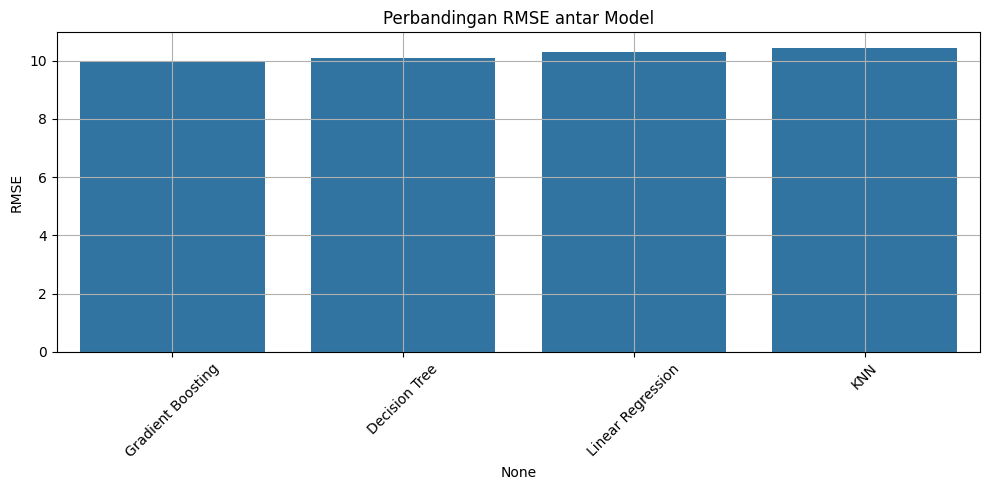

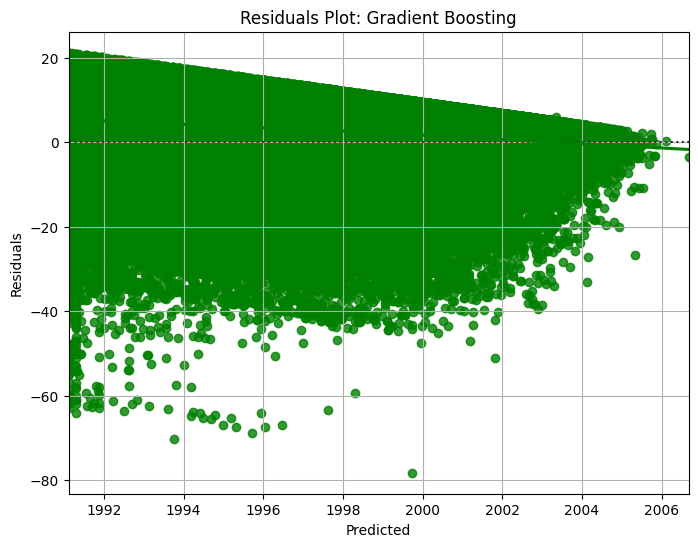

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot RMSE
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title("Perbandingan RMSE antar Model")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot untuk model terbaik
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green')
plt.title(f'Residuals Plot: {best_model_name}')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

### 6. Evaluasi dan Perbandingan Metrik

- **MSE (Mean Squared Error)** sangat sensitif terhadap outlier karena penalti kuadrat.
- **RMSE (Root MSE)** dalam satuan yang sama dengan target, lebih mudah dipahami secara praktis.
- **R² (Koefisien Determinasi)** menunjukkan proporsi variansi target yang dijelaskan oleh model. Nilai mendekati 1 lebih baik.

 **Dalam konteks ini, RMSE dan R² menjadi metrik utama. RMSE untuk interpretasi langsung dalam skala target, dan R² untuk melihat kemampuan model menjelaskan variasi data.**


### 7. Penjelasan Setiap Model dan Kesimpulan Model Terbaik

#### a. Linear Regression
Model regresi paling dasar yang mengasumsikan hubungan linier antara fitur dan target. Sangat cepat dan mudah diinterpretasi, namun performanya menurun drastis jika hubungan antar variabel bersifat non-linear atau terdapat multikolinearitas.

#### b. Polynomial Regression
Pengembangan dari linear regression yang memasukkan fitur polinomial untuk menangkap hubungan non-linear. Cocok saat data menunjukkan pola melengkung, tetapi mudah overfitting jika derajat polinom terlalu tinggi.

#### c. Decision Tree Regressor
Model berbasis pohon keputusan yang mempartisi data secara rekursif. Mampu menangkap non-linearitas dan interaksi antar fitur, namun cenderung overfit tanpa pruning atau pengaturan kedalaman maksimum.

#### d. K-Nearest Neighbors (KNN) Regressor
Model prediksi berbasis rata-rata nilai target dari tetangga terdekat. Tidak membuat asumsi eksplisit tentang distribusi data, tetapi performanya sangat tergantung pada pemilihan jumlah tetangga dan normalisasi fitur.

#### e. Bagging Regressor
Ensemble dari banyak decision tree yang dilatih pada subset data berbeda secara acak. Mengurangi varians tanpa menambah bias secara signifikan. Stabil dan cocok untuk dataset besar dengan noise.

#### f. AdaBoost Regressor
Model boosting yang mempelajari kesalahan iteratif dari model sebelumnya. Lebih fokus pada data sulit, bisa memberikan hasil sangat baik, tetapi sensitif terhadap outlier dan noise.

#### g. Gradient Boosting Regressor
Salah satu model paling kuat dan fleksibel dalam regresi tabular. Mengoptimalkan loss secara bertahap dan menangkap pola kompleks dengan presisi tinggi. Perlu tuning hati-hati untuk menghindari overfitting.

#### h. Support Vector Regressor (SVR)
Regresi berbasis margin, cocok untuk data kecil dengan noise minimal. Sering tidak skala baik terhadap data besar dan perlu normalisasi yang ketat. Kernel sangat memengaruhi performa.


## Kesimpulan Model Terbaik

Berdasarkan hasil evaluasi menggunakan **RMSE** dan **R²**, model yang paling konsisten memberikan error rendah dan menjelaskan variabilitas target dengan baik adalah Gradient Boosting Regressor. Model ini unggul dalam fleksibilitas dan presisi karena kemampuannya menangkap hubungan kompleks serta mengontrol overfitting melalui parameter tuning.

Namun, jika residual plot menunjukkan adanya pola tertentu yang tidak tertangkap, model seperti Polynomial Regression atau Decision Tree Regressormasih dapat dikembangkan lebih lanjut. Untuk baseline interpretatif dan data bersifat linier, Linear Regression tetap relevan.

Singkatnya, Gradient Boosting Regressor adalah pilihan terbaik untuk keseimbangan performa, stabilitas, dan kemampuan menangani kompleksitas data regresi nyata.


# Analisis Teoritis

### 1. Mengatasi Underfitting
Jika linear regression atau decision tree underfit, dua strategi yang bisa digunakan adalah menambah kompleksitas fitur (seperti fitur polinomial) atau mengganti model ke yang lebih fleksibel seperti Gradient Boosting. Transformasi fitur menurunkan bias dan tetap menjaga interpretabilitas, sedangkan model kompleks langsung menangani pola non-linear tapi bisa meningkatkan varians.

### 2. MAE vs Huber Loss
MAE lebih tahan outlier karena tidak menghukum kesalahan besar secara ekstrem, tapi bisa sulit dioptimasi. Huber loss adalah kompromi antara MSE dan MAE: stabil untuk training dan tetap tahan outlier. MAE cocok untuk data noisy, Huber lebih cocok saat perlu stabilitas dengan proteksi terhadap outlier.

### 3. Mengukur Pentingnya Fitur
Pentingnya fitur bisa diukur lewat koefisien model linear atau feature importance dari model pohon. Koefisien bagus untuk interpretasi, tapi rentan terhadap multikolinearitas. Feature importance lebih fleksibel tapi cenderung bias terhadap fitur dengan banyak kategori.

### 4. Hyperparameter Tuning
Gunakan GridSearchCV atau RandomizedSearchCV untuk eksperimen. Grid akurat tapi lambat, random lebih cepat untuk ruang besar. Harus seimbang antara waktu komputasi, stabilitas model, dan kemampuan generalisasi. Validasi silang penting agar hasil tidak overfit ke satu split data.

### 5. Mengatasi Residual Non-Linear dan Heteroskedastisitas
Kalau residual plot menunjukkan pola non-linear atau varians tidak stabil, solusinya bisa transformasi data (log, sqrt) atau ganti model ke yang lebih fleksibel seperti tree atau boosting. Tujuannya membuat residual menyebar acak di sekitar nol—tanda bahwa model cocok dengan data.


